In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

In [3]:
def load_data(data_path):
    X, y = [], []
    for actor in os.listdir(data_path):
        actor_path = os.path.join(data_path, actor)
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                emotion_code = int(file.split('-')[2])
                if emotion_code in [1, 2, 3, 4, 5, 6]:  # Filter useful emotions
                    feature = extract_features(os.path.join(actor_path, file))
                    X.append(feature)
                    y.append(emotion_code)
    return np.array(X), np.array(y)


In [4]:
DATA_PATH =r"C:\Users\prash\Downloads\Audio_Speech_Actors_01-24"


In [5]:
X, y = load_data(DATA_PATH)

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [9]:
model = Sequential([
    Dense(256, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_onehot.shape[1], activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1463 - loss: 43.1388 - val_accuracy: 0.1651 - val_loss: 4.8637
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1637 - loss: 17.2151 - val_accuracy: 0.1934 - val_loss: 2.0938
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1690 - loss: 5.8470 - val_accuracy: 0.1840 - val_loss: 1.7896
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1765 - loss: 2.5679 - val_accuracy: 0.1840 - val_loss: 1.7883
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1947 - loss: 1.9964 - val_accuracy: 0.1840 - val_loss: 1.7871
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1724 - loss: 2.0866 - val_accuracy: 0.1840 - val_loss: 1.7862
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1833 - loss: 1.9212 - val_accuracy: 0.1840 - val_loss: 1.7851
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2024 - loss: 1.8530 - val_accuracy: 0.1840 - val_lo

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1405 - loss: 1.7812 

Test Accuracy: 0.16


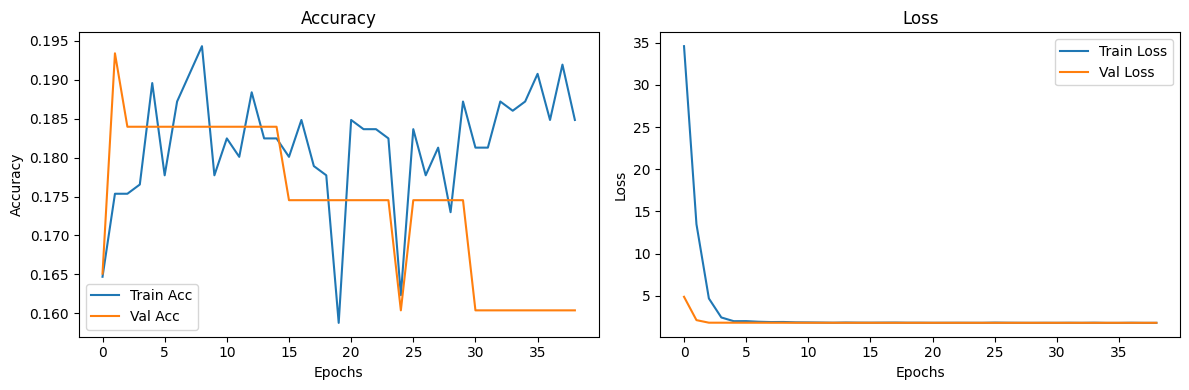

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
def predict_emotion(file_path):
    feature = extract_features(file_path).reshape(1, -1)
    prediction = model.predict(feature)
    emotion_index = np.argmax(prediction)
    emotion_label = le.inverse_transform([emotion_index])[0]
    return emotion_label


In [14]:
file = r"C:\\Users\\prash\\Downloads\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav"
print("Predicted Emotion:", predict_emotion(file))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Emotion: 4


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [16]:
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_onehot.shape[1], activation='softmax'))


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1682 - loss: 42.4866 - val_accuracy: 0.1698 - val_loss: 3.2972
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1930 - loss: 10.2290 - val_accuracy: 0.1887 - val_loss: 1.9379
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1398 - loss: 5.7542 - val_accuracy: 0.1934 - val_loss: 1.7766
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1979 - loss: 4.1737 - val_accuracy: 0.1415 - val_loss: 1.7705
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1797 - loss: 3.3986 - val_accuracy: 0.1274 - val_loss: 1.7907
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2068 - loss: 2.8708 - val_accuracy: 0.1887 - val_loss: 1.7744
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1965 - loss: 2.3986 - val_accuracy: 0.1604 - val_loss: 1.7767
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1852 - loss: 2.2203 - val_accuracy: 0.1698 - val_lo

In [19]:
# Modern recommended format
model.save("emotion_model.keras")  # Save in Keras format


In [23]:
file_path = r"C:\Users\prash\Downloads\Audio_Speech_Actors_01-24\Actor_01\03-01-01-01-01-01-01.wav"
feature = extract_features(file_path).reshape(1, -1)
prediction = model.predict(feature)
predicted_emotion = le.inverse_transform([np.argmax(prediction)])
print("Predicted Emotion:", predicted_emotion[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Emotion: 5


In [24]:
import librosa

audio, sr = librosa.load(file_path, sr=None)

In [28]:
import librosa
import numpy as np

def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

file_path = r"C:\Users\prash\Downloads\Audio_Speech_Actors_01-24\Actor_01\03-01-01-01-01-01-01.wav"  # update this if new file uploaded
features = extract_features(file_path)
X_input = np.expand_dims(features, axis=0)


In [29]:
prediction = model.predict(X_input)
predicted_class = np.argmax(prediction)

# Example label map
emotion_labels = {
    0: "neutral",
    1: "calm",
    2: "happy",
    3: "sad",
    4: "angry",
    5: "fearful"
}

print("Predicted Emotion:", emotion_labels.get(predicted_class, "Unknown"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Emotion: angry
